In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# comparing Pilatus and Eiger Ni 25 µm frames against each other

The data has pre-processed by Lennard Krause into HKL files.

Please follow this rabbit hole:  SADABS 2016/2: Krause, L., Herbst-Irmer, R., Sheldrick G.M. & Stalke D.,
 J. Appl. Cryst. 48 (2015) 3-10

In [2]:
def read_hkl(path: str, skipfooter: int = 300) -> pd.core.frame.DataFrame:
    """
     read a path .hkl file and return as a Pandas dataframe
    """
    # TODO: is it d? What is doom?
    df = pd.read_csv(path,
                     engine='python',
                     header=None,
                     delim_whitespace=True,
                     names=['h', 'k', 'l', 'intensity', 'd', 'doom'], # I don't know exactly what the last field is
                     dtype={'h': int, 'k': int, 'l': int, 'intensity': float, 'd': float, 'doom': int},
                     skipfooter=skipfooter
                    )
    
    # merge the H,K,L columns into a single tuple-column
    df['hkl'] = df[['h','k','l']].apply(tuple, axis=1)
    # remove the others again
    for x in ['h', 'k', 'l']:
        df.pop(x)
    
    # TODO: reorder hkl to 0th column again?
    
    # return!
    return df

In [3]:
# Ni 25 µm foils
eiger_ni25 = read_hkl('0347.hkl', skipfooter=833)
pilatus_ni25 = read_hkl('0376.hkl', skipfooter=650)


# others
eiger_w025 = read_hkl('0349.hkl') #TODO: footer
eiger_w050 = read_hkl('0350.hkl') #TODO: footer

pilatus_w050 = read_hkl('0373.hkl') #TODO: footer
pilatus_ni75_w025 = read_hkl('0376.hkl') #TODO: footer

In [4]:
# sanity check
pilatus_ni25

,intensity,d,doom,hkl
0,1961.08000,3.33450,1,"(2, 0, 0)"
1,0.10085,0.06096,1,"(3, 0, 0)"
2,0.11120,0.06592,1,"(3, 0, 0)"
3,481.63100,2.31635,1,"(4, 0, 0)"
4,462.07200,2.15793,1,"(4, 0, 0)"
5,2006.05000,5.29129,1,"(6, 0, 0)"
6,2086.72000,5.63986,1,"(6, 0, 0)"
7,2.18844,0.05829,1,"(0, 1, 0)"
8,15.08260,0.17504,1,"(1, 1, 0)"
9,15.40700,0.26213,1,"(-1, 1, 0)"


In [5]:
from symmetry import Symmetry
symops = Symmetry['mmm']
print(symops[:3])

[[[ 1  0  0]
  [ 0  1  0]
  [ 0  0  1]]

 [[-1  0  0]
  [ 0 -1  0]
  [ 0  0  1]]

 [[-1  0  0]
  [ 0  1  0]
  [ 0  0 -1]]]


In [6]:
eiger_ni25['hkl'][0]

(-1, 0, 0)

In [7]:
hkl = eiger_ni25['hkl'][0]
# dotproduct of the hkl and symmetry operations
dp = np.array(hkl).dot(symops)

# find unique HKL after performing that
unique = np.unique(dp, axis=0)
print(f'Length dp {len(dp)} and length unique {len(unique)}')
print(unique)

Length dp 8 and length unique 2
[[-1  0  0]
 [ 1  0  0]]


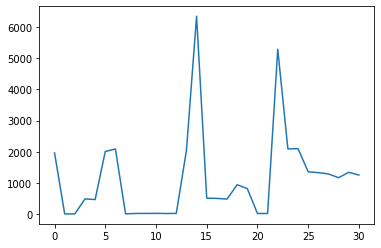

In [8]:
fig, ax = plt.subplots()

ax.plot(pilatus_ni25['intensity'])